In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
from keras.datasets.mnist import load_data
# ((x_train, y_train), (x_test, y_test))
(x_train, y_train), (x_test, y_test) = load_data()

In [6]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


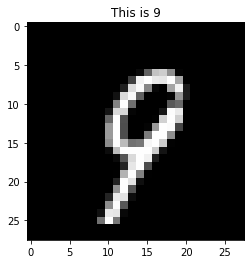

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
i = random.randint(0, 59999)
plt.title("This is {}".format(y_train[i]))
plt.imshow(x_train[i], cmap="gray")